In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (double click to edit):

- Name 1:
- Name 2:
- Name 3:


# In Class Assignment One
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#Loading">Loading the Data</a>
* <a href="#linearnumpy">Linear Regression</a>
* <a href="#sklearn">Using Scikit Learn for Regression</a>
* <a href="#classification">Linear Classification</a>

________________________________________________________________________________________________________

<a id="Loading"></a>
<a href="#top">Back to Top</a>
## Loading the Data
Please run the following code to read in the "diabetes" dataset from sklearn's data loading module. 

This will load the data into the variable `ds`. `ds` is a dictionary object with fields like `ds.data`, which is a matrix of the continuous features in the dataset. The object is not a pandas dataframe. It is a numpy matrix. Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is a continuous value we are trying to predict. Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [20]:
from sklearn.datasets import load_diabetes
import numpy as np
from __future__ import print_function
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option("display.max_columns", None, "display.max_rows", None)
%matplotlib inline



ds = load_diabetes()

# this holds the continuous feature data
# because ds.data is a matrix, there are some special properties we can access (like 'shape')
print('features shape:', ds.data.shape, 'format is:', ('rows','columns')) # there are 442 instances and 10 features per instance
print('range of target:', np.min(ds.target),np.max(ds.target))

features shape: (442, 10) format is: ('rows', 'columns')
range of target: 25.0 346.0


In [21]:
from pprint import pprint

# we can set the fields inside of ds and set them to new variables in python
pprint(ds.data) # prints out elements of the matrix
pprint(ds.target) # prints the vector (all 442 items)

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])
array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37

________________________________________________________________________________________________________
<a id="linearnumpy"></a>
<a href="#top">Back to Top</a>
## Using Linear Regression 
In the videos, we derived the formula for calculating the optimal values of the regression weights (you must be connected to the internet for this equation to show up properly):

$$ w = (X^TX)^{-1}X^Ty $$

where $X$ is the matrix of values with a bias column of ones appended onto it. For the diabetes dataset one could construct this $X$ matrix by stacking a column of ones onto the `ds.data` matrix. 

$$ X=\begin{bmatrix}
         & \vdots &        &  1 \\
        \dotsb & \text{ds.data} & \dotsb &  \vdots\\
         & \vdots &         &  1\\
     \end{bmatrix}
$$

**Question 1:** For the diabetes dataset, how many elements will the vector $w$ contain?

In [22]:
# Enter your answer here (or write code to calculate it)

num_features = len(ds.data[0])
# Weights have 1 element per feature plus 1 bias weight
print('Weights Elements = ',num_features + 1)



Weights Elements =  11


________________________________________________________________________________________________________

**Exercise 1:** In the following empty cell, use this equation and numpy matrix operations to find the values of the vector $w$. You will need to be sure $X$ and $y$ are created like the instructor talked about in the video. Don't forget to include any modifications to $X$ to account for the bias term in $w$. You might be interested in the following functions:

- `np.hstack((mat1,mat2))` stack two matrices horizontally, to create a new matrix
- `np.ones((rows,cols))` create a matrix full of ones
- `my_mat.T` takes transpose of numpy matrix named `my_mat`
- `np.dot(mat1,mat2)` is matrix multiplication for two matrices
- `np.linalg.inv(mat)` gets the inverse of the variable `mat`

In [23]:
# Write you code here, print the values of the regression weights using the 'print()' function in python

#Create an array of ones to stack as 0th element in X vextors
bias1= np.ones((len(ds.data),1))
#Stack the bias at top of X matrix to be 0th element
X = np.hstack((bias1, ds.data))
#print(X)

#Set the target variable as y
y = ds.target

#Building up the equation for w as shown in section above
#Step 1: (X.T @ X) --> Start withe cross product of X and the transposition of X
#Step 2: np.linalg.inv(X.T @ X) --> use function to take the inverse of step 1 cross product matrix
#Step 3: (np.linalg.inv(X.T @ X) @ X.T) --> get cross product of inverse matrix from step 2 and X transposed
#Step 4: (np.linalg.inv(X.T @ X) @ X.T) @ y --> cross product of matrix from step 3 and the target array y
#Use full equation to solve for w matrix
w = (np.linalg.inv(X.T @ X) @ X.T) @ y

#Confirm w has 11 elements: note it is in rows, i.e. tall matrix not wide
print(w.shape)
#Inspect w
print(w)





(11,)
[ 152.13348416  -10.01219782 -239.81908937  519.83978679  324.39042769
 -792.18416163  476.74583782  101.04457032  177.06417623  751.27932109
   67.62538639]



___
<a id="sklearn"></a>
<a href="#top">Back to Top</a>
# Start of Live Session Coding

**Exercise 2:** Scikit-learn also has a linear regression fitting implementation. Look at the scikit learn API and learn to use the linear regression method. The API is here: 

- API Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Use the sklearn `LinearRegression` module to check your results from the previous question. 

**Question 2**: Did you get the same parameters? 

In [24]:
from sklearn.linear_model import LinearRegression

# regression with sklearn
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(ds.data, ds.target)

print('sklearn Intercept: ', regr.intercept_)
print('sklearn Coefficients: ', regr.coef_)

#Note the output here matches our w matrix which contains the intercept as first element followed by coefficients
# Intercept: [152.13348416]
# Coefficients: [[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163 
# 476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]]

print('w matrix for comparison (first element is intercept, followed by coefficients): ',w)




print('model coefficients are:', regr.coef_)
print('model intercept is', regr.intercept_)
print('Answer to question is, ' 'Yes they have the same parameters')

sklearn Intercept:  152.1334841628965
sklearn Coefficients:  [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
w matrix for comparison (first element is intercept, followed by coefficients):  [ 152.13348416  -10.01219782 -239.81908937  519.83978679  324.39042769
 -792.18416163  476.74583782  101.04457032  177.06417623  751.27932109
   67.62538639]
model coefficients are: [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
model intercept is 152.1334841628965
Answer to question is, Yes they have the same parameters


________________________________________________________________________________________________________

Recall that to predict the output from our model, $\hat{y}$, from $w$ and $X$ we need to use the following formula:

- $\hat{y}=w^TX^T$

Where $X$ is a matrix with example instances in *each row* of the matrix. 

**Exercise 3:** 
- *Part A:* Use matrix multiplication to predict output using numpy, $\hat{y}_{numpy}$ and also using the sklearn regression object, $\hat{y}_{sklearn}$.
 - **Note**: you may need to make the regression weights a column vector using the following code: `w = w.reshape((len(w),1))` This assumes your weights vector is assigned to the variable named `w`.
- *Part B:* Calculate the mean squared error between your prediction from numpy and the target, $\sum_i(y-\hat{y}_{numpy})^2$. 
- *Part C:* Calculate the mean squared error between your sklearn prediction and the target, $\sum_i(y-\hat{y}_{sklearn})^2$.

Tips: 
* You can use reg.predict() and ds.data to get your predictions. for scikit learn.
* To do this for numpy you will need to reshape w using w.ravel() or some other method.
* You can calculate MSE using: from sklearn.metrics import mean_squared_error

MSE Sklearn is: 2859.6903987680657
MSE Numpy is: 2859.6903987680657


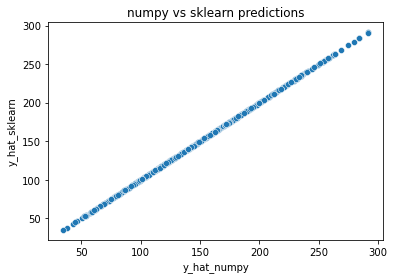

In [28]:
# Use this block to answer the questions
y_hat_numpy = w.T @ X.T
#print(y_hat_numpy)

y_hat_sklearn = regr.predict(ds.data)

import seaborn as sns
sns.scatterplot(x=y_hat_numpy, y=y_hat_sklearn)
plt.xlabel("y_hat_numpy")
plt.ylabel("y_hat_sklearn")
plt.title("numpy vs sklearn predictions") 

# w = w.reshape((len(w),1)) # make w a column vector

from sklearn import metrics
print('MSE Sklearn is:', metrics.mean_squared_error(ds.target, y_hat_sklearn))
print('MSE Numpy is:', metrics.mean_squared_error(ds.target, y_hat_numpy))

________________________________________________________________________________________________________
<a id="classification"></a>
<a href="#top">Back to Top</a>
## Using Linear Classification
Now lets use the code you created to make a classifier with linear boundaries. Run the following code in order to load the iris dataset.

In [8]:
from sklearn.datasets import load_iris
import numpy as np

# this will overwrite the diabetes dataset
ds = load_iris()
print('features shape:', ds.data.shape) # there are 150 instances and 4 features per instance
print('original number of classes:', len(np.unique(ds.target)))

# now let's make this a binary classification task
ds.target = ds.target>1
print ('new number of classes:', len(np.unique(ds.target)))

features shape: (150, 4)
original number of classes: 3
new number of classes: 2


________________________________________________________________________________________________________

**Exercise 4:** Now use linear regression to come up with a set of weights, `w`, that predict the class value. This is exactly like you did before for the *diabetes* dataset. However, instead of regressing to continuous values, you are just regressing to the integer value of the class (0 or 1), like we talked about in the video. Remember to account for the bias term when constructing the feature matrix, `X`. Print the weights of the linear classifier.

Tips:
* This is exactly like Q1, but we are switching datasets!	
* Since the Iris dataset has only 5 columns, you will only have 5 weights for w this time!

In [9]:
# write your code here and print the values of the weights 






#

________________________________________________________________________________________________________

**Exercise 5:** Finally, use a hard decision function on the output of the linear regression to make this a binary classifier. This is just like we talked about in the video, where the output of the linear regression passes through a function: 

- $\hat{y}=g(w^TX^T)$ where
 - $g(w^TX^T)$ for $w^TX^T < \alpha$ maps the predicted class to `0` 
 - $g(w^TX^T)$ for $w^TX^T \geq \alpha$ maps the predicted class to `1`. 

Here, alpha is a threshold for deciding the class. 

**Question 3**: What value for $\alpha$ makes the most sense? What is the accuracy of the classifier given the $\alpha$ you chose? 

Note: You can calculate the accuracy with the following code: `accuracy = float(sum(yhat==y)) / len(y)` assuming you choose variable names `y` and `yhat` for the target and prediction, respectively.

Tips: 
* This is exactly like Q1, but we are switching datasets!	
* Since the Iris dataset has only 5 columns, you will only have 5 weights for w this time!

In [10]:
# use this box to predict the classification output





print('Percentage accuracy:', '??')

Percentage accuracy: ??


________________________________________________________________________________________________________

That's all! Please **save (make sure you saved!!!) and upload your rendered notebook** and please include **team member names** in the notebook submission.